## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [3]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [4]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 26s 0us/step


In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [11]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,  
                                   name="hidden_layer"+str(i+1))(input_layer)
            x =  BatchNormalization()(x)
            x = keras.layers.Activation('relu')(x)
        else:
            x = keras.layers.Dense(units=n_units,  
                                   name="hidden_layer"+str(i+1))(x)
            x =  BatchNormalization()(x)
            x = keras.layers.Activation('relu')(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [12]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping


results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for monitor in ['val_acc', 'acc']:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    earlystop = EarlyStopping(monitor=monitor, 
                          patience=5, 
                          verbose=1
                          )

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    exp_name_tag = "monitor {}".format(monitor)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0726 17:21:48.840079 13088 deprecation_wrapper.py:119] From c:\users\twnb02872-01\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0726 17:21:49.033082 13088 deprecation_wrapper.py:119] From c:\users\twnb02872-01\appdata\local\programs\python\python36\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0726 17:21:49.040582 13088 deprecation_wrapper.py:119] From c:\users\twnb02872-01\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0726 17:21:49.126542 13088 deprecation.py:323] From c:\users\twnb02872-01\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.w

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
__________

50000/50000 [==============================] - 6s 115us/step - loss: 1.7963 - acc: 0.3705 - val_loss: 1.8181 - val_acc: 0.3577
Epoch 3/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.6756 - acc: 0.4165 - val_loss: 1.7310 - val_acc: 0.3897
Epoch 4/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.6021 - acc: 0.4437 - val_loss: 1.6648 - val_acc: 0.4148
Epoch 5/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.5465 - acc: 0.4628 - val_loss: 1.6199 - val_acc: 0.4315
Epoch 6/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.5006 - acc: 0.4800 - val_loss: 1.5939 - val_acc: 0.4378
Epoch 7/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.4604 - acc: 0.4954 - val_loss: 1.5659 - val_acc: 0.4489
Epoch 8/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.4243 - acc: 0.5077 - val_loss: 1.5380 - val_acc: 0.4571
Epoch 9/50
50000/50000 [======================

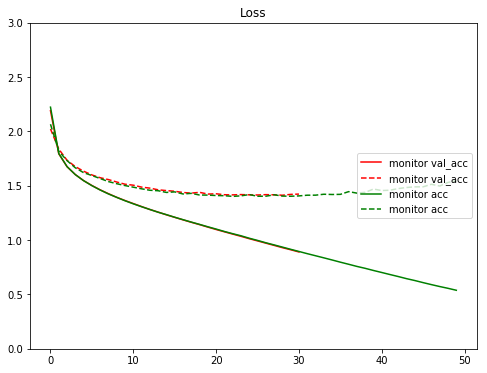

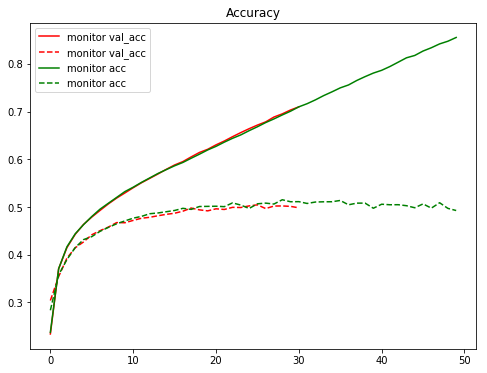

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 3])
plt.legend(loc='right')
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [16]:
results_p = {}
for patience in [5, 10, 25]:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    earlystop = EarlyStopping(monitor='val_acc', 
                          patience=patience, 
                          verbose=1
                          )

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    exp_name_tag = "patience {}".format(patience)
    results_p[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
activation_16 (Activation)   (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
activation_17 (Activation)   (None, 256)               0         
__________

50000/50000 [==============================] - 8s 158us/step - loss: 2.2598 - acc: 0.2315 - val_loss: 2.1135 - val_acc: 0.2863
Epoch 2/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.8024 - acc: 0.3681 - val_loss: 1.8152 - val_acc: 0.3590
Epoch 3/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.6829 - acc: 0.4098 - val_loss: 1.7161 - val_acc: 0.3958
Epoch 4/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.6105 - acc: 0.4385 - val_loss: 1.6683 - val_acc: 0.4089
Epoch 5/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.5545 - acc: 0.4599 - val_loss: 1.6268 - val_acc: 0.4246
Epoch 6/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.5089 - acc: 0.4762 - val_loss: 1.5987 - val_acc: 0.4341
Epoch 7/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.4684 - acc: 0.4898 - val_loss: 1.5767 - val_acc: 0.4435
Epoch 8/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 158us/step - loss: 2.1689 - acc: 0.2353 - val_loss: 1.9731 - val_acc: 0.3003
Epoch 2/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.7829 - acc: 0.3737 - val_loss: 1.7842 - val_acc: 0.3700
Epoch 3/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.6662 - acc: 0.4181 - val_loss: 1.7082 - val_acc: 0.3958
Epoch 4/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.5957 - acc: 0.4439 - val_loss: 1.6550 - val_acc: 0.4203
Epoch 5/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.5413 - acc: 0.4638 - val_loss: 1.6111 - val_acc: 0.4351
Epoch 6/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.4962 - acc: 0.4808 - val_loss: 1.5828 - val_acc: 0.4448
Epoch 7/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.4566 - acc: 0.4942 - val_loss: 1.5590 - 

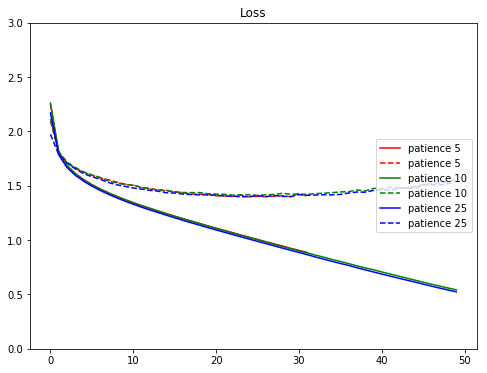

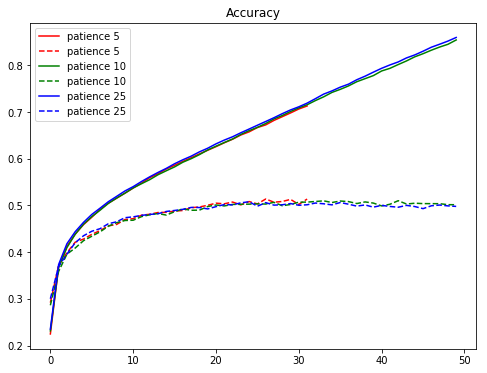

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", 'b']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_p.keys()):
    plt.plot(range(len(results_p[cond]['train-loss'])),results_p[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_p[cond]['valid-loss'])),results_p[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 3])
plt.legend(loc='right')
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_p.keys()):
    plt.plot(range(len(results_p[cond]['train-acc'])),results_p[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_p[cond]['valid-acc'])),results_p[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()